# SVM

Dataset: Advortisement dataset with other parameter.

I have imported library numpy for mathmatical calculation, Pandas for dataframe functionality, matplotlib for visualising result and seaborn for producing statistical graph.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns 
%matplotlib inline

## Reading Data

CSV file importing using pandas csv read function.

In [2]:
# Importing the dataset
dataset = pd.read_csv('Internet_Ads.csv')

Checking and understanding dataset, statistical analysis of dataset to know insights

In [3]:
dataset.head()

,User ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID      400 non-null int64
Gender       400 non-null object
Age          400 non-null int64
Salary       400 non-null int64
Purchased    400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.describe()

,User ID,Age,Salary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

## EDA

Creating some simple plots to check out the data and understanding the statistical relationship of attributes. Exploring these types of relationships across the entire data set.

Using seaborn pairplot library function to represent graph.

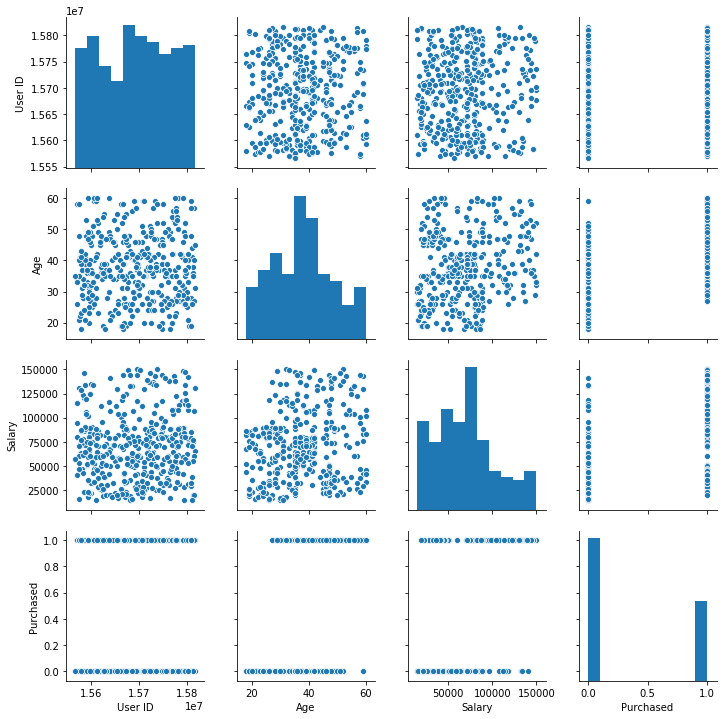

In [7]:
sns.pairplot(dataset)

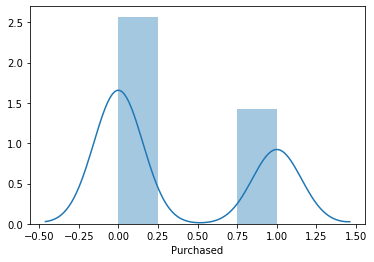

In [8]:
sns.distplot(dataset['Purchased'])

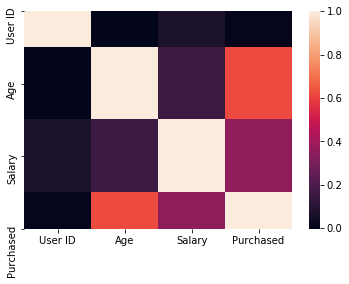

In [9]:
sns.heatmap(dataset.corr())

## Dependent & Indepedent variable seperating

I need to first split up our data into an X array that contains the features to train on in the case of Support Vector model it is other feature, and a y array with the target variable, in this case the Purchase column

In [10]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Train Test Split 

spliting the data into a training set and a testing set. I will train out model on the training set and then use the test set to evaluate the model.

I have taken 75% of dataset for train and 25% data for test. In my exprement 70% and 80% are giving same result due to the small size of dataset.

I have used 'train_test_split' function from Sklearn library to split the depedent and indepedent variable for model training and testing.

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Standardizing the value.

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating and Training the Model 

Calling SVC function from SKlearn libraary. 
Preparing a classifier to fit on depedend and indepedent training dataset.

In [14]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predictions from our Model

Now using nave classifier training model to generate prdiction of test data.

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

## Test the performance

Using confusion matrix to check the accuracy and performance from SKlearn.

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Confusion matrix calculate and generate true positive, true negative and false positive and false negative and shws the difference between predicted value and actual value which represent the accuracy of the model. The values are bellow:

In [20]:
print(confusion_matrix(y_test,y_pred))

[[66  2]
 [ 8 24]]


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9


Predicted sample accuracy is 90% is a good model.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



## Visualizing Result

Ploting classification on train data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


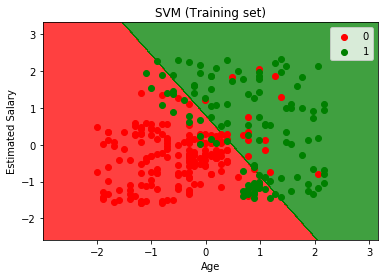

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Ploting classification on test data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


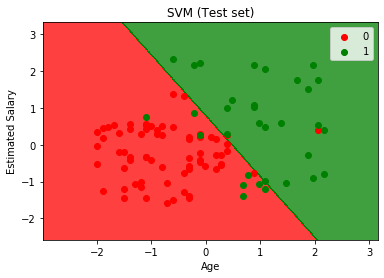

In [23]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Result represent a good classification model using SVM algorithm. Graph shows some wrong classification for both the class, example in green colour area has some red datapoint and red are has some green data point. as per confution matrix the model is 90% correct which means the mode still predict 10% wrong which is considerable for this small dataset.